# DZ Bank – Take Home Assignment  
## Vorhersage der Zielvariable *y* im Bank-Marketing-Datensatz

## Inhaltsverzeichnis

1. **Daten laden**  
2. **Erste Daten- und Strukturübersicht**  
3. **Analyse der Zielvariable *y***  
4. **Explorative Datenanalyse (EDA)**  
   - 4.1 Numerische Features  
   - 4.2 Kategoriale Features  

## 1. Daten laden  
In diesem Abschnitt wird der Bank-Marketing-Datensatz eingelesen und eine erste Sicht auf die Struktur gewonnen.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Kernel und Bibliotheken wurden erfolgreich geladen.")


Kernel und Bibliotheken wurden erfolgreich geladen.


In [4]:
import os
os.listdir(".")

['.git',
 '.gitignore',
 '.venv',
 'bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank_marketing_eda.ipynb',
 'README.md']

In [5]:
df = pd.read_csv("bank.csv", sep=";")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 2. Erste Daten- und Strukturübersicht  
Hier werden grundlegende Eigenschaften des Datensatzes untersucht:  
- Anzahl Zeilen und Spalten  
- Datentypen  
- Vorhandensein von Missing Values  
- Erste sichtbare Patterns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [71]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## 3. Analyse der Zielvariable *y*  
Ziel ist es zu verstehen, wie ausgeglichen oder unausgeglichen die Zielvariable ist, da dies einen großen Einfluss auf die Modellwahl und die Metriken hat.

In [10]:
df["y"].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [11]:
df["y"].value_counts(normalize=True)

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

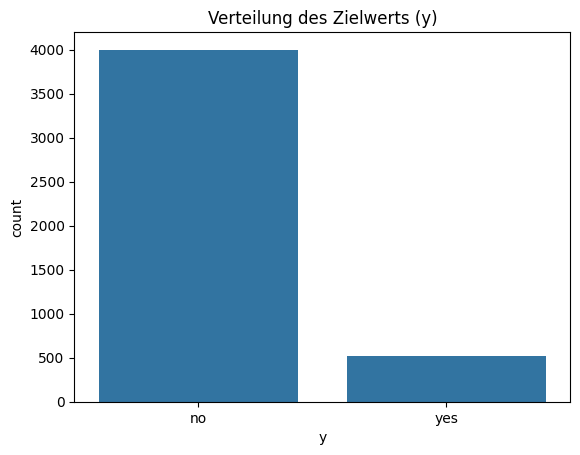

In [39]:
sns.countplot(data=df, x="y")
plt.title("Verteilung des Zielwerts (y)")
plt.show()

### Key Insights:
- *y* ist deutlich unausgeglichen (ca. 88% **no**, 12% **yes**)  
- Accuracy allein wäre keine geeignete Metrik  
- Relevant sind insbesondere: Precision, Recall, F1, ROC-AUC

## 4. Explorative Datenanalyse (EDA)
In der explorativen Datenanalyse werden die Merkmale des Datensatzes systematisch untersucht, 
um Muster, Verteilungen, Ausreißer und erste Zusammenhänge mit der Zielvariable *y* zu erkennen.  
Die EDA liefert wichtige Erkenntnisse darüber, welche Features besonders informativ sind 
und legt damit die Grundlage für das spätere Preprocessing und die Modellierung.


## 4.1 Numerische Features  
Hier werden die numerischen Variablen analysiert, um Verteilungen, Ausreißer  
und mögliche Zusammenhänge mit der Zielvariable zu identifizieren.

### Zu analysierende Features:
- `age`
- `balance`
- `duration`
- `campaign`

Für jedes Feature werden Histogramme, Boxplots und Vergleiche nach *y* durchgeführt.
Zum Schluss wird noch eine Korrelationsmatrix der numerischen Features erstellt.

### 4.1.1 Alter (*age*)

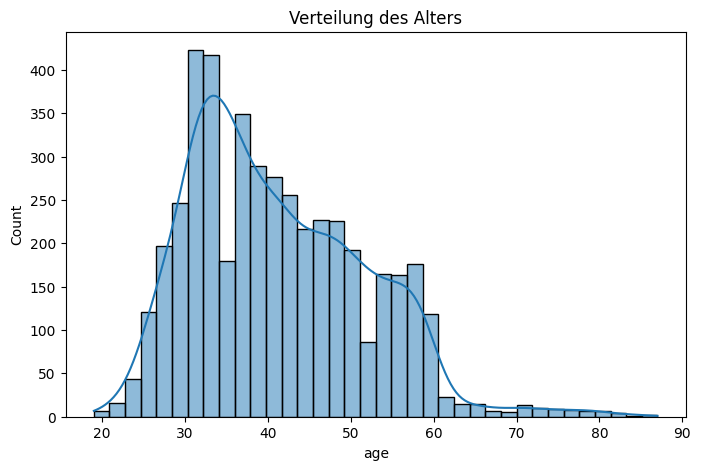

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], kde=True)
plt.title("Verteilung des Alters")
plt.xlabel("age")
plt.show()

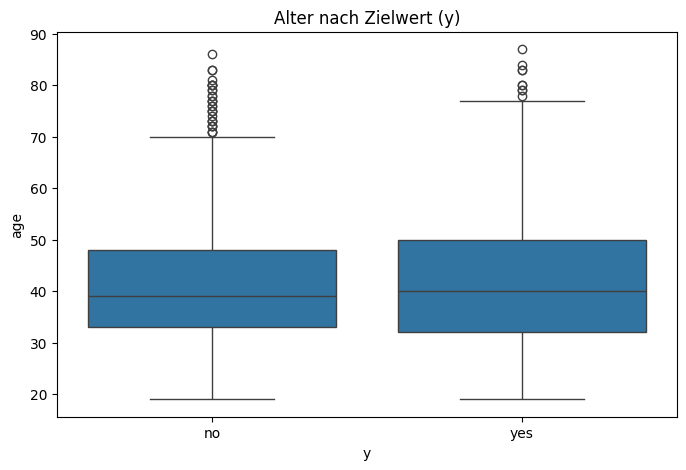

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="age")
plt.title("Alter nach Zielwert (y)")
plt.show()

**Verteilung:**
- Alter der Kunden reicht von 19 bis 87 Jahren.
- Der Median liegt knapp unter 40 Jahren.

**Zusammenhang mit y:**
- YES-Kunden sind im Median etwas älter als NO-Kunden.
- Der Unterschied ist sichtbar, aber nicht stark.
- Outlier ab 70+ kommen häufiger in NO vor.

**Interpretation:**  
Alter hat einen **moderaten Einfluss** auf die Abschlusswahrscheinlichkeit.  
Jüngere Kunden schließen seltener ab, ältere gelegentlich häufiger, 
aber der Effekt ist deutlich schwächer als bei anderen Variablen wie *duration*.

### 4.1.2 Kontostand (*balance*)

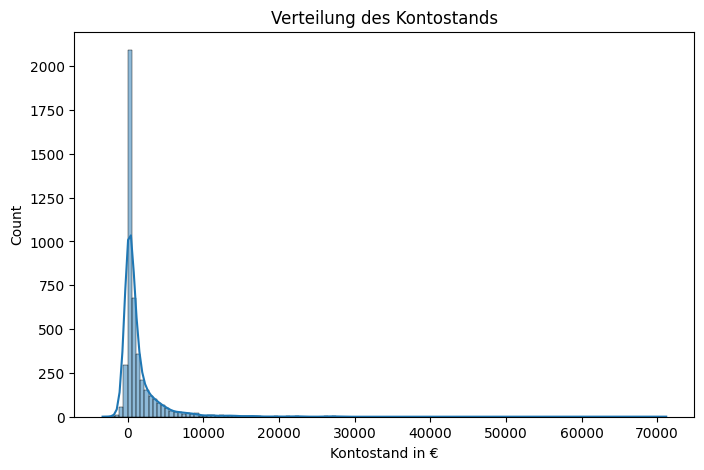

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df["balance"], kde=True)
plt.title("Verteilung des Kontostands")
plt.xlabel("Kontostand in €")
plt.show()

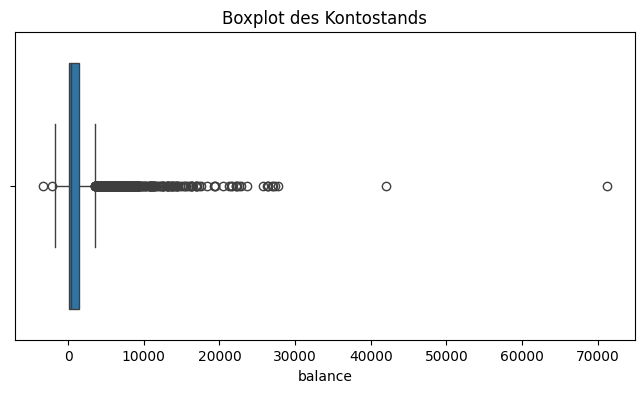

In [43]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["balance"])
plt.title("Boxplot des Kontostands")
plt.show()

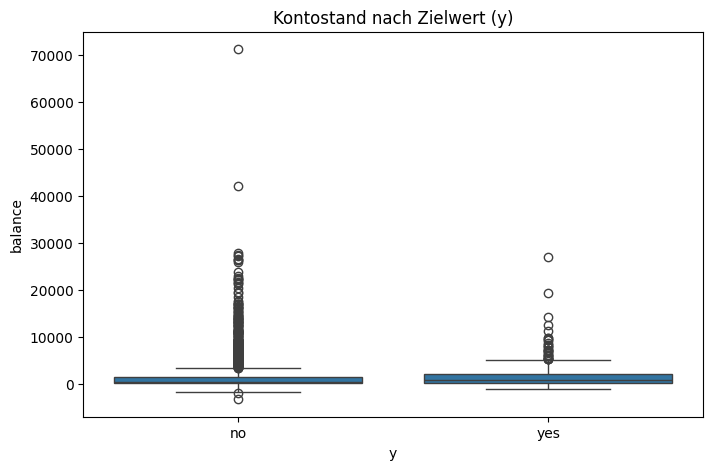

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="balance")
plt.title("Kontostand nach Zielwert (y)")
plt.show()

**Verteilung:**
- Sehr stark rechtsschiefe Verteilung.
- Großteil der Kunden hat extrem niedrige Kontostände (Peak nahe 0 €).
- Viele Outlier bis 30.000 € und ein extremer Outlier über 70.000 €.
- Negative Werte möglich (Kontoüberziehung).

**Zusammenhang mit y:**
- Median bei YES leicht höher als bei NO.
- YES zeigt weniger extreme Outlier als NO.
- Große Variation in beiden Gruppen.

**Interpretation:**  
*balance* ist stark verzerrt, zeigt leichte Unterschiede zwischen YES und NO, 
aber ist kein dominanter Prädiktor.  
Dennoch enthält es wertvolle Informationen über finanzielle Stabilität.

### 4.1.3 Gesprächsdauer (*duration*)

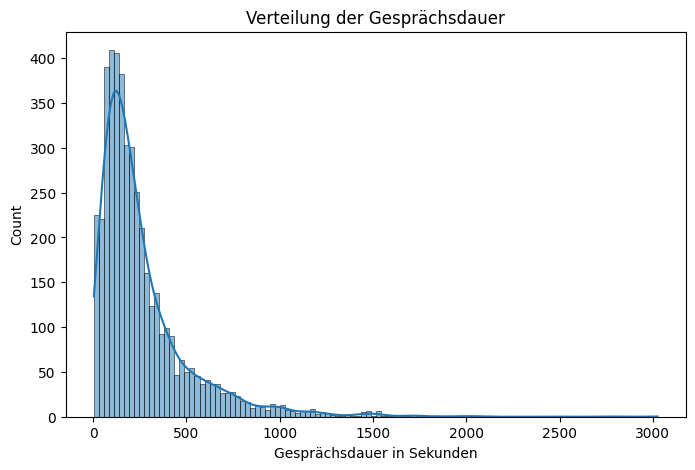

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df["duration"], kde=True)
plt.title("Verteilung der Gesprächsdauer")
plt.xlabel("Gesprächsdauer in Sekunden")
plt.show()

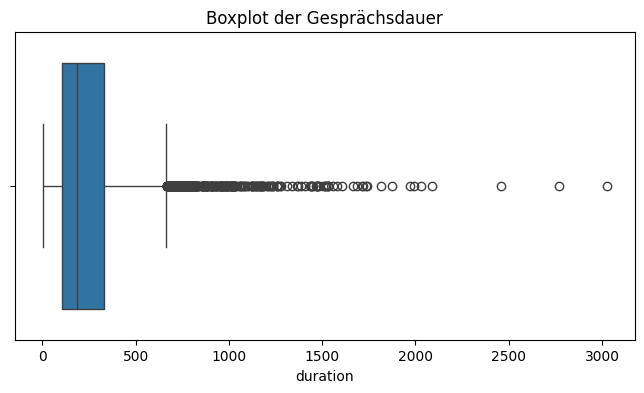

In [44]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["duration"])
plt.title("Boxplot der Gesprächsdauer")
plt.show()

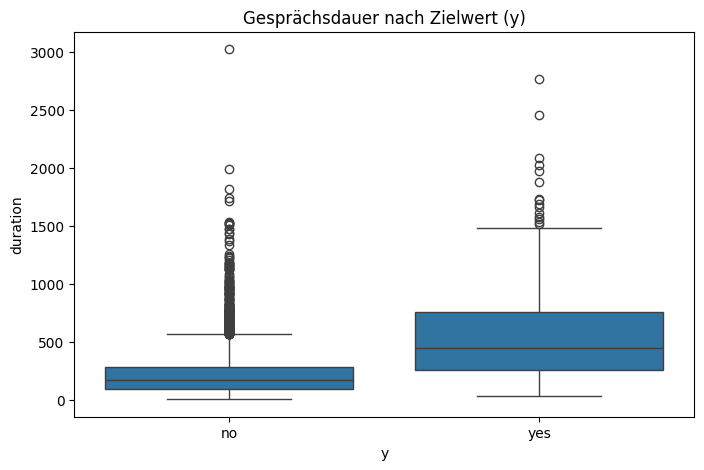

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="duration")
plt.title("Gesprächsdauer nach Zielwert (y)")
plt.show()

**Verteilung:**
- Extrem rechtsschief: viele sehr kurze Calls, wenige extrem lange.
- Werte reichen von wenigen Sekunden bis über 3.000 Sekunden (50 Minuten).

**Zusammenhang mit y:**
- **YES-Kunden haben deutlich längere Gesprächsdauern.**
- Median bei NO: ~200 Sekunden  
- Median bei YES: ~500 Sekunden  
- Outlier bei YES beginnen erst bei ca. 1500 Sekunden.

**Interpretation:**  
*duration* ist einer der **stärksten Prädiktoren** im gesamten Datensatz.  
Lange Gespräche spiegeln Interesse wider.  
In realen Szenarien wäre Vorsicht geboten, da *duration* ein „post-event“-Feature ist, aber im Kontext dieses Assignments ist es extrem informativ.

### 4.1.4 Anzahl der Kontakte in dieser Kampagne (*campaign*)

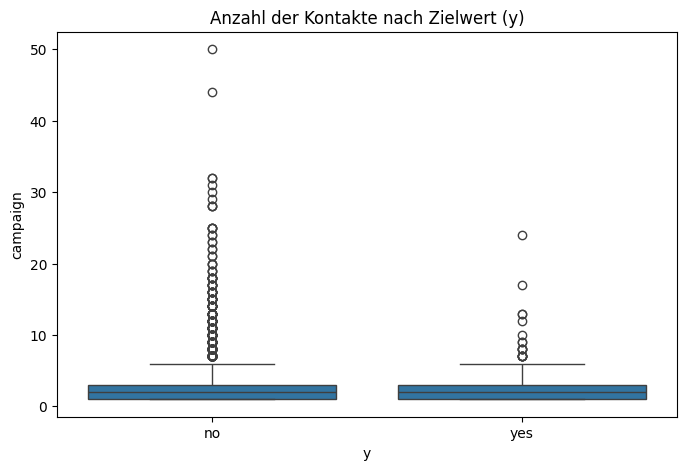

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="campaign")
plt.title("Anzahl der Kontakte nach Zielwert (y)")
plt.show()

**Verteilung:**
- Die meisten Kunden wurden 1–3 Mal kontaktiert.
- Es existieren extreme Outlier bis zu 50 Kontakten.

**Zusammenhang mit y:**
- Median bei YES und NO nahezu identisch.
- NO-Kunden weisen deutlich mehr hohe Outlier auf.
- Viele Kontakte korrelieren mit Ablehnung → Kunden sind oft „genervt“.

**Interpretation:**  
*campaign* hat einen **schwachen, aber nachvollziehbaren Einfluss**:  
Je öfter ein Kunde kontaktiert wurde, desto eher lehnt er ab.  
Der Effekt ist jedoch deutlich geringer ausgeprägt als bei *duration*.

### 4.1.5 Korrelationsmatrix der numerischen Features

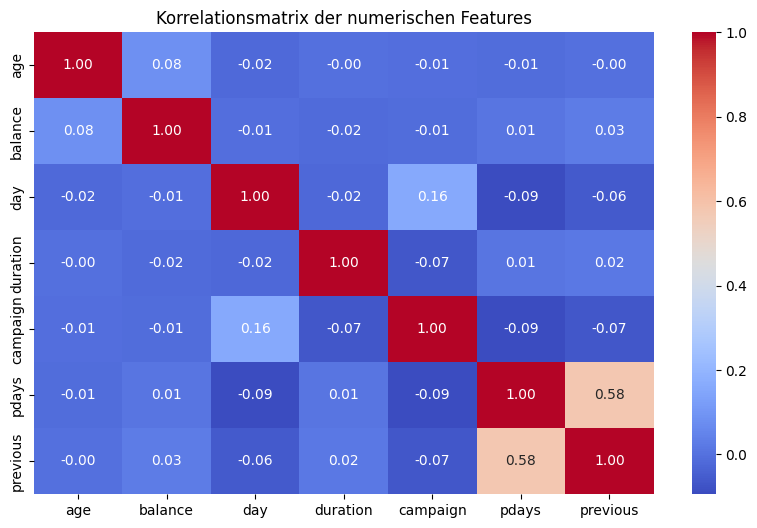

In [36]:
plt.figure(figsize=(10, 6))

numerical_df = df.select_dtypes(include=["int64"])
corr = numerical_df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix der numerischen Features")
plt.show()


**Wichtigste Beobachtungen aus der Korrelationsmatrix:**

- Zwischen **pdays** und **previous** besteht eine **deutlich positive Korrelation** von etwa **0.58**.  
  Das ist logisch: Je öfter ein Kunde in der Vergangenheit kontaktiert wurde (*previous*), desto eher ist auch ein positiver Wert bei *pdays* (Tage seit letzter Kontaktaufnahme) vorhanden.
- Zwischen **day** und **campaign** gibt es eine leichte positive Korrelation von ca. **0.16**.  
  Kunden, die später im Monat kontaktiert werden, hatten tendenziell etwas mehr Kontaktversuche, der Effekt ist aber schwach.
- Alle anderen numerischen Features zeigen nur sehr geringe Korrelationen (nahe 0) zueinander.

**Interpretation:**  
Abgesehen von der erwartbaren Korrelation zwischen *pdays* und *previous* sind die numerischen Variablen weitgehend unabhängig.  
Es gibt **keine problematische Multikollinearität**, was günstig für Modelle wie die logistische Regression ist.  
Gleichzeitig bestätigt die geringe Korrelation von *duration* zu anderen Features, dass dieses Merkmal ein **eigenständiger, sehr informativer Prädiktor** ist.

## 4.2 Kategoriale Features

In diesem Abschnitt werden alle wichtigen kategorialen Variablen analysiert, um Muster und Unterschiede in der Abschlusswahrscheinlichkeit (*y*) zu erkennen.  
Die Kombination aus Countplots und Vergleichen nach *y* liefert wertvolle Einsichten 
für spätere Modellierung und Marketingstrategie.

Dazu zählen insbesondere:

- **job**
- **marital**
- **education**
- **default**
- **housing**
- **loan**
- **contact**
- **month**
- **poutcome** 

### 4.3.1 Beruf (*job*)


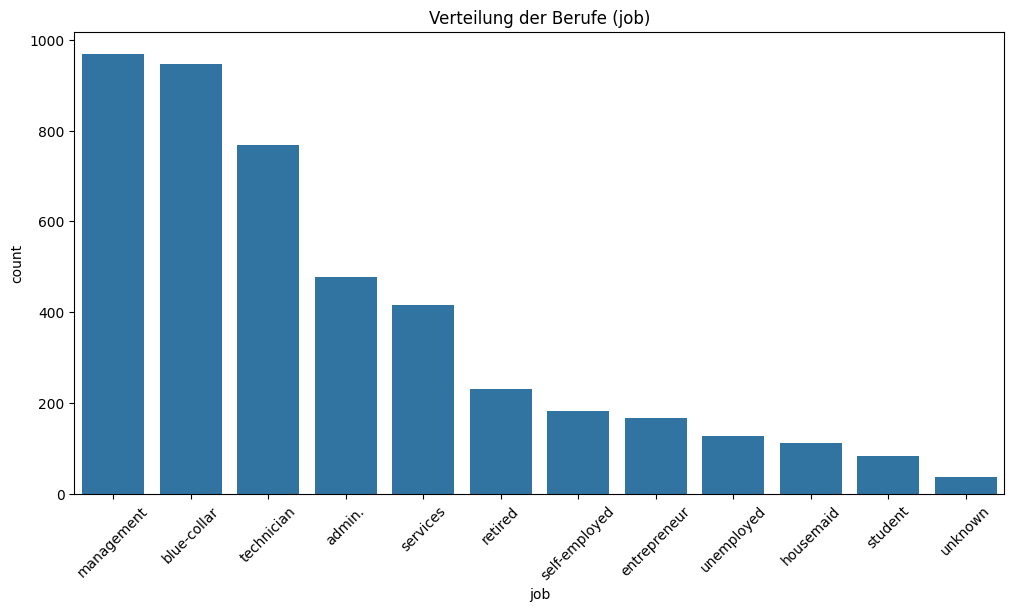

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="job", order=df["job"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Verteilung der Berufe (job)")
plt.show()

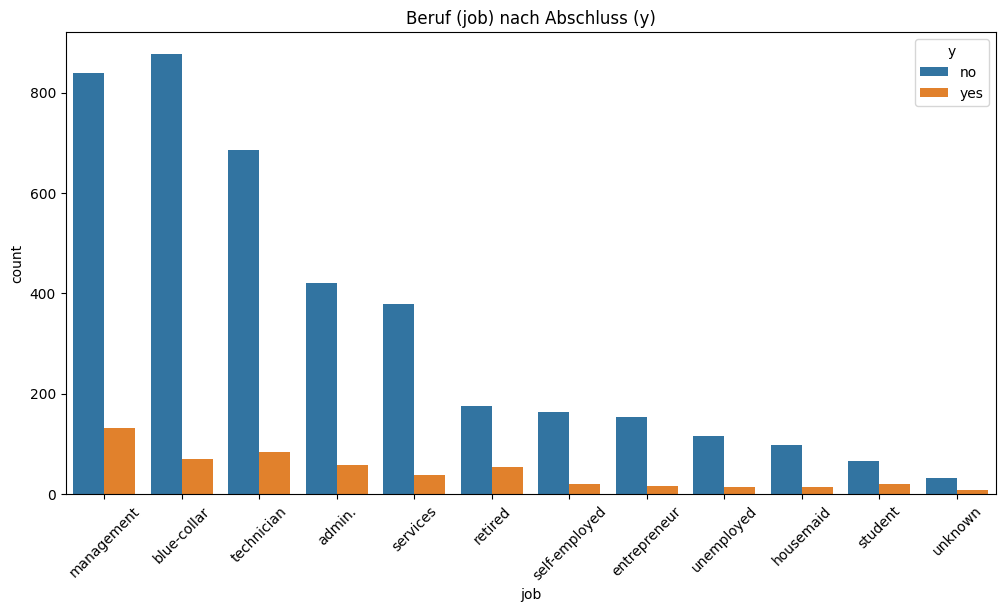

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="job", hue="y",
              order=df["job"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Beruf (job) nach Abschluss (y)")
plt.show()

**Verteilung & Beobachtungen:**
- Die häufigsten Berufsgruppen sind **management**, **blue-collar** und **technician**.
- Kleinere Gruppen: *student*, *housemaid*, *unemployed*, *unknown*.

**Zusammenhang mit y:**
- Die Abschlussrate ist **nicht proportional zur Gruppengröße**.  
- *technician*, *retired* und teilweise *self-employed* zeigen höhere YES-Anteile.  
- *blue-collar*, *services*, *housemaid* und *student* haben extrem niedrige YES-Raten.

**Interpretation:**  
Einige kleine Gruppen haben überraschend gute Konversionsraten, während große Gruppen nur schlecht konvertieren.  
Berufsgruppen sind daher ein **relevanter Prädiktor für Segmentierung** und haben klaren Marketing-Mehrwert.

### 4.3.2 Familienstand (*marital*)

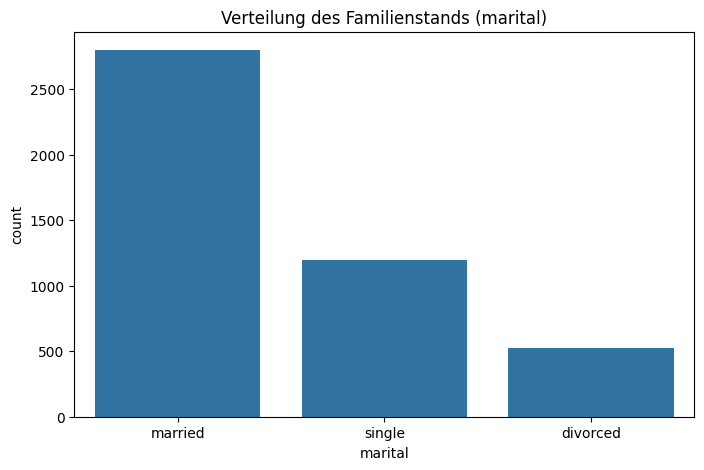

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="marital", order=df["marital"].value_counts().index)
plt.title("Verteilung des Familienstands (marital)")
plt.show()

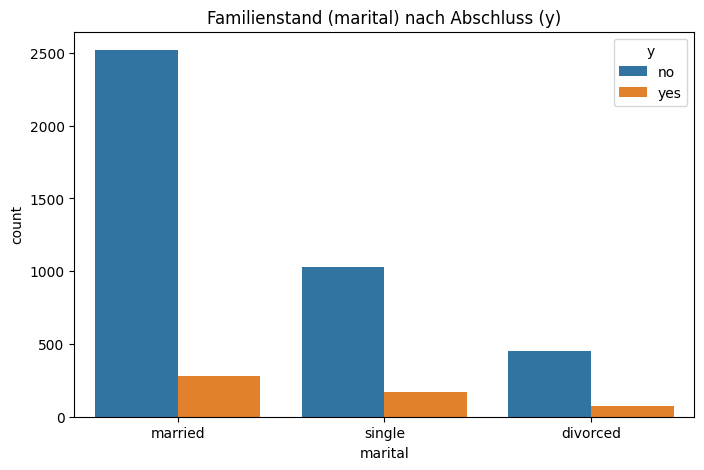

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="marital", hue="y",
              order=df["marital"].value_counts().index)
plt.title("Familienstand (marital) nach Abschluss (y)")
plt.show()

**Verteilung:**
- *married* ist die größte Gruppe.
- *single* etwa halb so groß.
- *divorced* deutlich kleiner.

**Zusammenhang mit y:**
- *single* zeigt relativ höhere Abschlussraten als married.
- *married* hat viele NOs, moderate YES.
- *divorced* ähnelt singles, aber mit kleinerer Fallzahl.

**Interpretation:**  
Der Familienstand beeinflusst die Abschlussrate leicht, aber weniger stark als z.B. *job*.


### 4.3.3 Bildungsniveau (*education*)

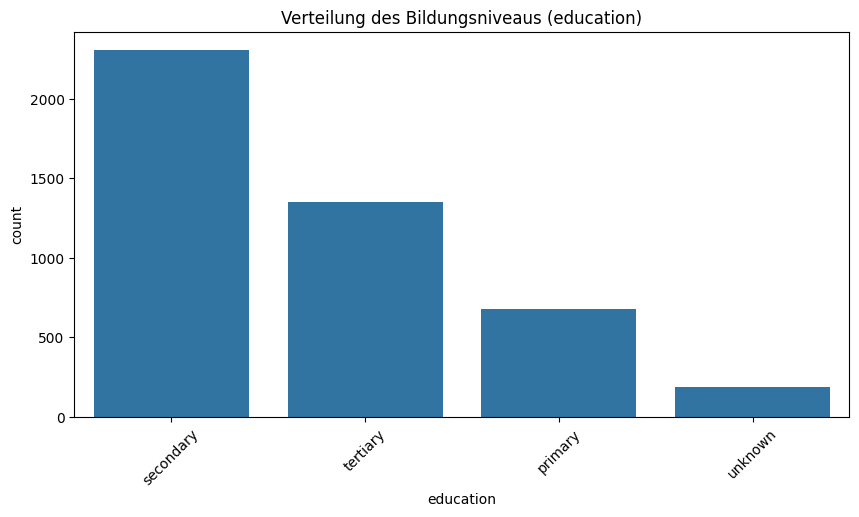

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="education", order=df["education"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Verteilung des Bildungsniveaus (education)")
plt.show()

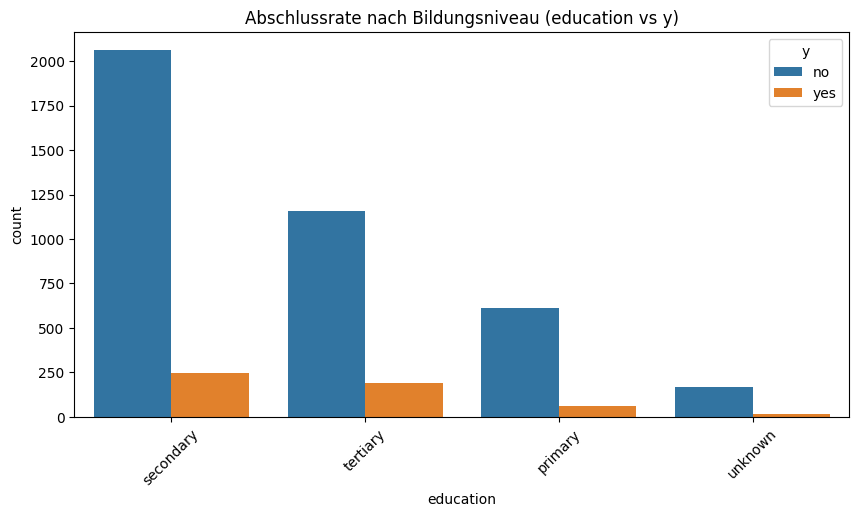

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="education", hue="y", 
              order=df["education"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Abschlussrate nach Bildungsniveau (education vs y)")
plt.show()

**Verteilung:**
- Größtenteils *secondary* und *tertiary*.
- Kleine Gruppen: *primary*, *unknown*.

**Zusammenhang mit y:**
- *tertiary* hat leicht höhere YES-Raten.
- *primary* und *unknown* haben sehr niedrige Abschlusswahrscheinlichkeiten.

**Interpretation:**  
Höhere Bildung korreliert leicht positiv mit Abschluss, aber der Effekt ist moderat.

### 4.3.4 Kreditausfallhistorie (*default*)

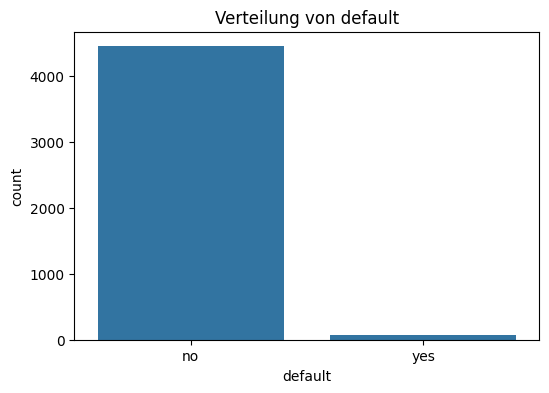

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="default", order=df["default"].value_counts().index)
plt.title("Verteilung von default")
plt.show()

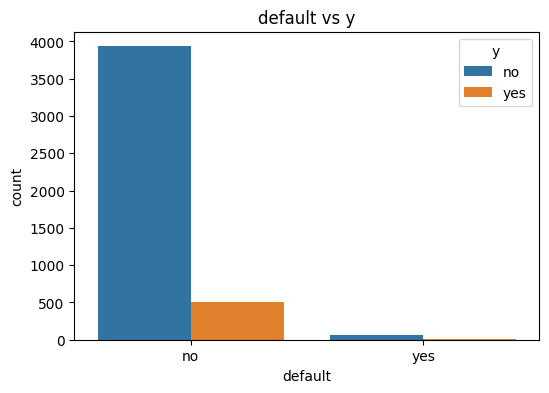

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="default", hue="y", 
              order=df["default"].value_counts().index)
plt.title("default vs y")
plt.show()

**Verteilung:**
- Extreme Mehrheit: *no*.
- *yes* praktisch nicht vorhanden.

**Zusammenhang mit y:**
- Kein signifikanter Zusammenhang erkennbar.

**Interpretation:**  
Dieses Feature ist **praktisch unbrauchbar** für Modellierung oder Insights (zu geringe Varianz).

### 4.3.5 Immobilienkredit (*housing*)

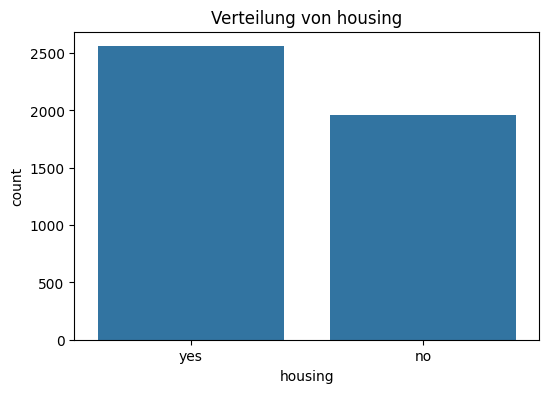

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="housing", order=df["housing"].value_counts().index)
plt.title("Verteilung von housing")
plt.show()

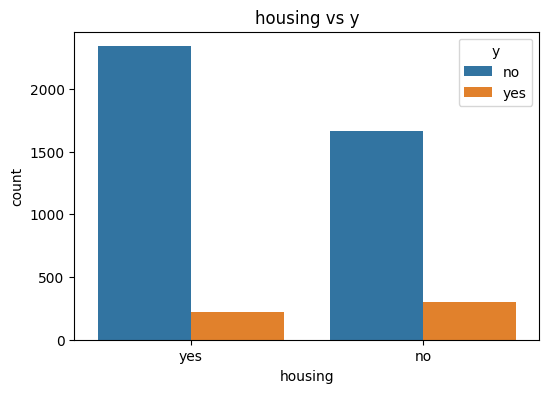

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="housing", hue="y", 
              order=df["housing"].value_counts().index)
plt.title("housing vs y")
plt.show()

**Verteilung:**
- Mehrheit der Kunden hat einen Immobilienkredit (*yes*).

**Zusammenhang mit y:**
- Kunden **ohne** Immobilienkredit zeigen leicht höhere Abschlussraten.

**Interpretation:**  
Leichter Effekt, aber kein sehr starkes Signal.

### 4.3.6 Konsumkredit (*loan*)

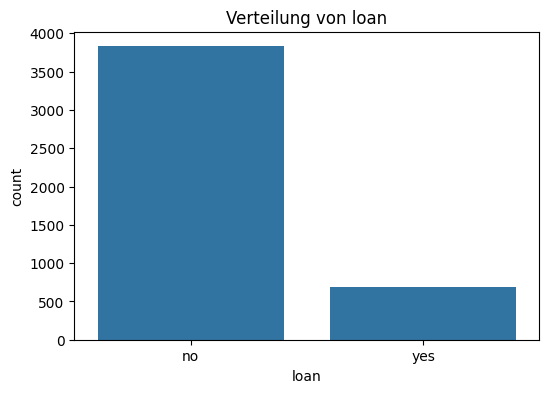

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="loan", order=df["loan"].value_counts().index)
plt.title("Verteilung von loan")
plt.show()

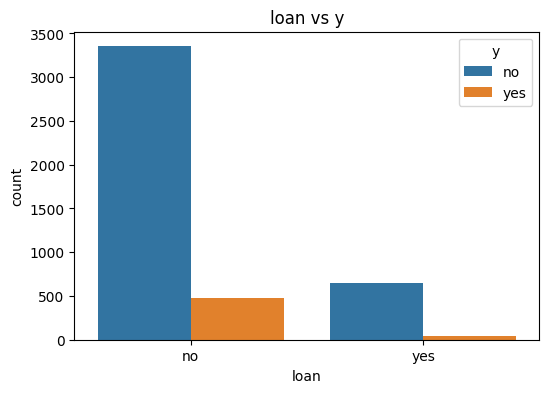

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="loan", hue="y", 
              order=df["loan"].value_counts().index)
plt.title("loan vs y")
plt.show()

**Verteilung:**
- Mehrheit: *no*.
- Minderheit: *yes*.

**Zusammenhang mit y:**
- Ähnlicher Trend wie bei *housing*:  
  Kunden ohne Kredit sind etwas eher bereit abzuschließen.

**Interpretation:**  
Schwach hilfreiches Feature, aber mit leichtem Trend.

### 4.3.7 Kontaktart (*contact*)

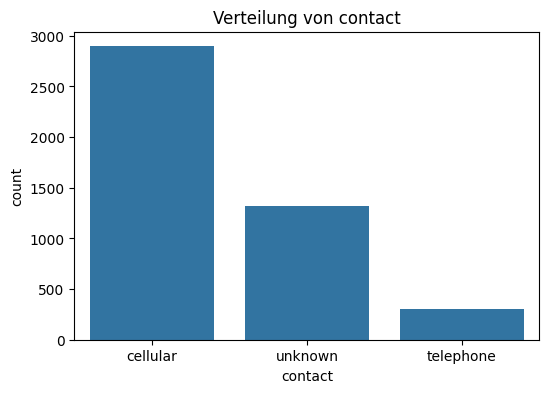

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="contact", order=df["contact"].value_counts().index)
plt.title("Verteilung von contact")
plt.show()

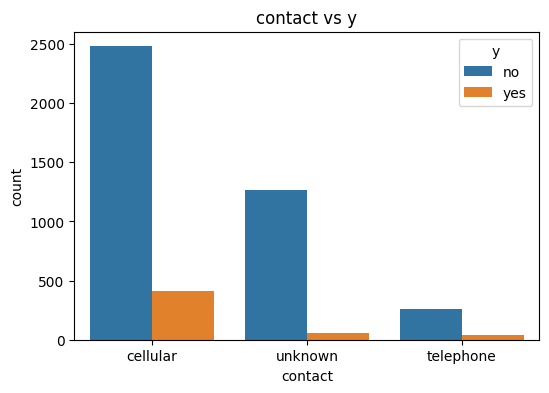

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="contact", hue="y", 
              order=df["contact"].value_counts().index)
plt.title("contact vs y")
plt.show()

**Verteilung:**
- Die meisten Kontakte über *cellular*.
- Wenige über *telephone*.

**Zusammenhang mit y:**
- *cellular* führt zu deutlich mehr YES-Fällen.
- *telephone* fast ausschließlich NO.

**Interpretation:**  
Modernere Kontaktwege erzeugen klar bessere Ergebnisse.  
Für Kampagnenplanung sehr wichtig.

### 4.3.8 Kontaktmonat (*month*)

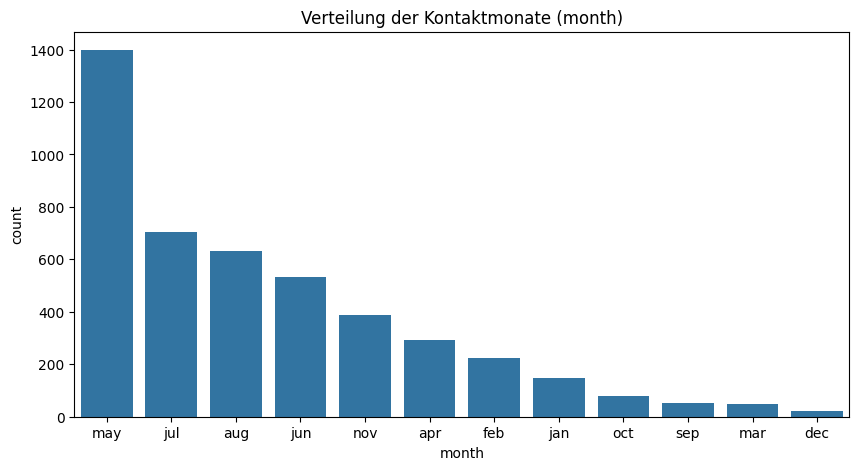

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="month", order=df["month"].value_counts().index)
plt.title("Verteilung der Kontaktmonate (month)")
plt.show()

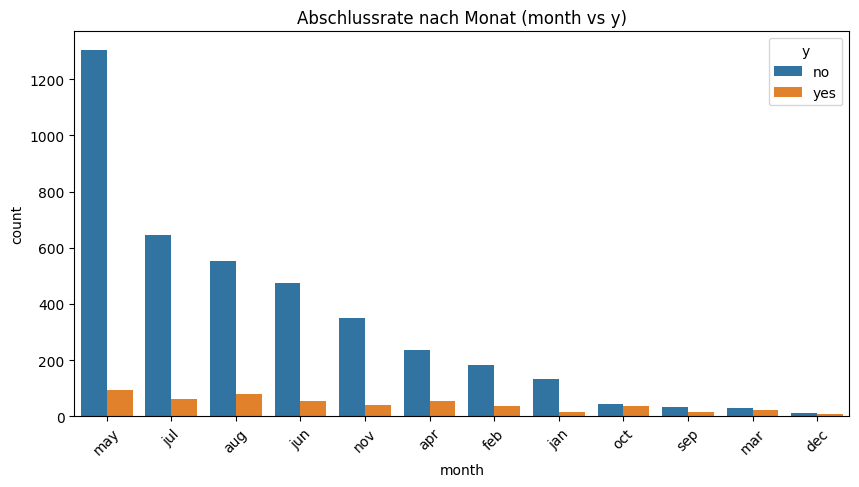

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="month", hue="y", 
              order=df["month"].value_counts().index)
plt.title("Abschlussrate nach Monat (month vs y)")
plt.xticks(rotation=45)
plt.show()

**Verteilung:**
- Mehr Kontakte zwischen Mai und August.
- Wenig Daten in z. B. März, Dezember.

**Zusammenhang mit y:**
- Manche Monate zeigen höhere relative Abschlussraten (z. B. Mai, August).
- Andere Monate fast nur NO (z. B. March, December).

**Interpretation:**  
Es existieren saisonale Effekte in der Abschlusswahrscheinlichkeit.  
Relevantes operatives Feature.

### 4.3.9 Ergebnis der vorherigen Kampagne (*poutcome*)

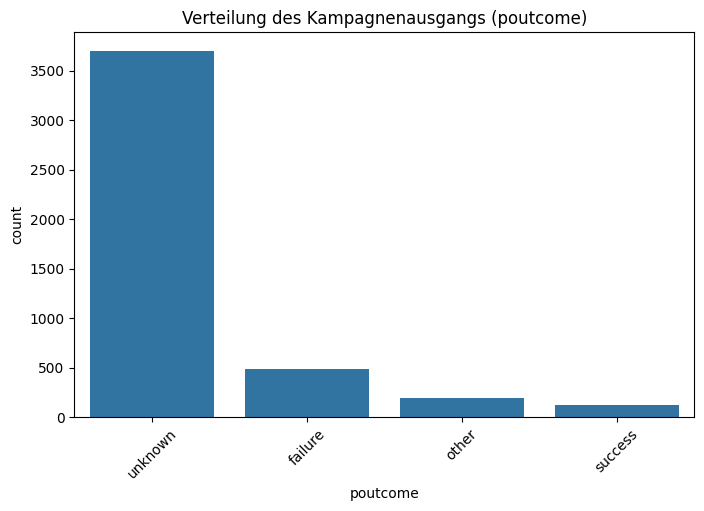

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="poutcome", order=df["poutcome"].value_counts().index)
plt.title("Verteilung des Kampagnenausgangs (poutcome)")
plt.xticks(rotation=45)
plt.show()

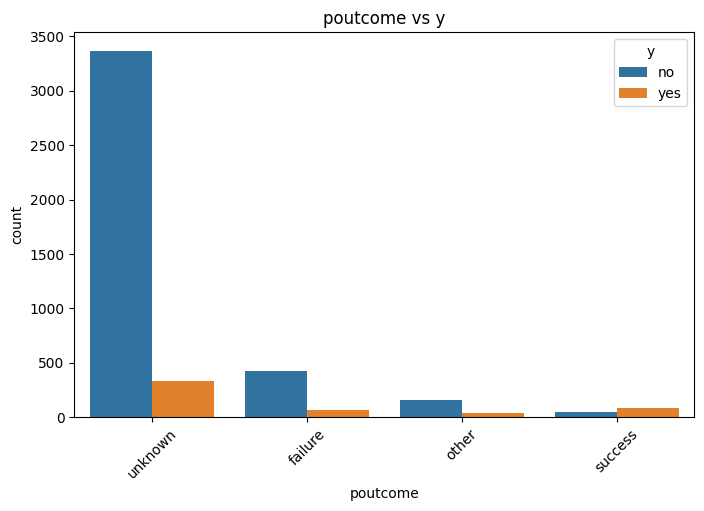

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="poutcome", hue="y",
              order=df["poutcome"].value_counts().index)
plt.title("poutcome vs y")
plt.xticks(rotation=45)
plt.show()

**Verteilung:**
- *unknown* dominiert (meisten Kunden wurden noch nie kontaktiert).
- *failure* moderat.
- *success* selten.

**Zusammenhang mit y:**
- *success* hat eine extrem hohe YES-Rate.
- *failure* hat niedrige Abschlusswahrscheinlichkeit.
- *unknown* ist durchschnittlich, aber eher niedrig.

**Interpretation:**  
*poutcome* ist eines der **stärksten kategorialen Features**.  
Ein vorheriger Erfolg ist ein hervorragender Indikator für zukünftige Abschlüsse  
→ sehr wertvolle Informationsquelle für ML und Marketing.